In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
#number of days to expiry
N_Days= 252

#number of Monte Carlo Simulations to run
N_Runs=100000

Spot_price=100
Strike=100


#distance of barrier away from strike price
barrier=10

#annualised implied volatility
volatility=0.15

In [3]:
np.random.seed(25)
rets=np.random.randn(N_Runs,N_Days)*volatility/np.sqrt(252)

In [4]:
rets.shape

(100000, 252)

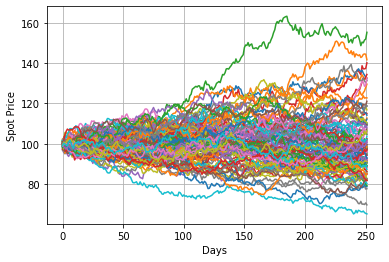

In [6]:
traces=np.cumprod(1+rets,1)*Spot_price

for i in traces[:100,:]:
    plt.plot(i)

plt.grid()
plt.xlabel("Days")
plt.ylabel("Spot Price")
plt.show()

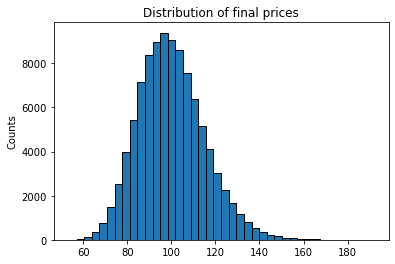

In [9]:
plt.hist(traces[:,-1],bins=40,edgecolor="k")
plt.title("Distribution of final prices")
plt.ylabel("Counts")
plt.show()

In [13]:
call=np.mean((traces[:,-1]-Strike)*((traces[:,-1]-Strike)>0))
call

5.959986363736703

In [14]:
put=np.mean((Strike-traces[:,-1])*((traces[:,-1]-Strike)<0))
put

5.946723440077413

In [17]:
barrier_call=np.mean(((traces[:,-1]-Strike)*((traces[:,-1]-Strike)>0))*((np.max(traces,axis=1)<(Strike+barrier))))

In [18]:
barrier_call

0.31065123017754165